## 5. 한글 텍스트 데이타 탐색과 전처리

### 1) 데이타 탐색 분석(EDA)

### 라이브러리 불러오기

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

### 데이타 불러오기
- ratings.txt : 전체 리뷰를 모아둔 데이터. 전체 20만개의 데이터로 구성
- ratings_train.txt : 학습 데이터. 총 15만개의 데이터로 구성
- ratings_test.txt : 테스트 데이터. 총 5만개의 데이터로 구성

In [2]:
DATA_IN_PATH = './data_in/'

In [3]:
# 현재 작업 directory 확인
os.getcwd()

'/Users/lisemara/work/machine_Learing/3. 텍스트 분류'

In [7]:
os.listdir(DATA_IN_PATH)

['train_clean.csv',
 'ratings_test.txt',
 'ratings.txt',
 '.DS_Store',
 'labeledTrainData.tsv',
 'testData.tsv',
 'ratings_train.txt',
 'test_clean.csv']

- 데이타 크기 확인

In [4]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file :
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')
#ljust(30) = 왼칸 30칸 잡고 정렬하기

파일 크기 : 
ratings_test.txt              4.89MB
ratings.txt                   19.52MB
ratings_train.txt             14.63MB


- 데이타 불러오기

In [8]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


- 데이타의 갯수 확인

In [6]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 150000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


### 리뷰의 문자 길이로 히스토그램 그리기

- 각 리뷰의 길이 확인

In [11]:
train_length = train_data['document'].astype(str).apply(len)

In [12]:
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

- 히스토그램 그리기

<ipython-input-13-42d39a46e827>:11: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of review')

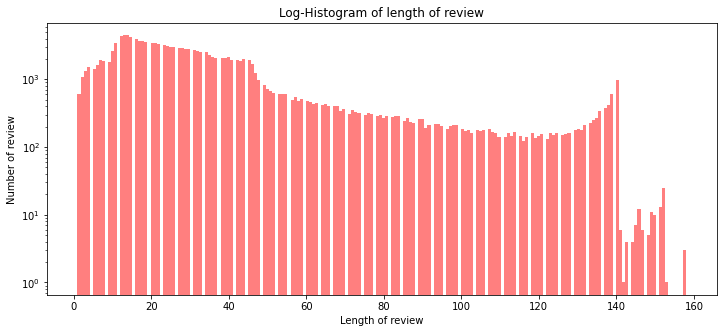

In [13]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

- 그래프 해석)
- 리뷰의 길이가 0부터 140까지 고르게 분포되어 있음
- 20자 이하에 많이 분포되어 있다가 길이가 길어질수록 점점 글자 수가 적어지는데 140자 부근에서 갑자기 글자수가 많아지는 모양
- 140자 글자 제한(한글기준)이 있는 데이타이기 때문에 쵣대 글자수에 조금 모여있는 형태임

### 리뷰 글자 길이 기술통계

In [14]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 158
리뷰 길이 최소 값: 1
리뷰 길이 평균 값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간 값: 27.0
리뷰 길이 제 1 사분위: 16.0
리뷰 길이 제 3 사분위: 42.0


- 해석)
- 리뷰 길이의 최대값은 158
- 최대 글자수가 140자이긴 하지만 특수문자등으로 인해 좀 더 긴 데이타가 포함되어 있는 것으로 보임
- 리뷰 길이의 최소값은 1이고 평균은 35자 정도, 중간값은 27자로 평균보다 좀 더 작은 값을 가진다.

### 리뷰 글자 길이의 박스 플롯

{'whiskers': [<matplotlib.lines.Line2D at 0x1532f5850>,
 'caps': [<matplotlib.lines.Line2D at 0x1532f5f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1532f54f0>],
 'medians': [<matplotlib.lines.Line2D at 0x153300610>],
 'fliers': [<matplotlib.lines.Line2D at 0x153300cd0>],
 'means': [<matplotlib.lines.Line2D at 0x153300970>]}

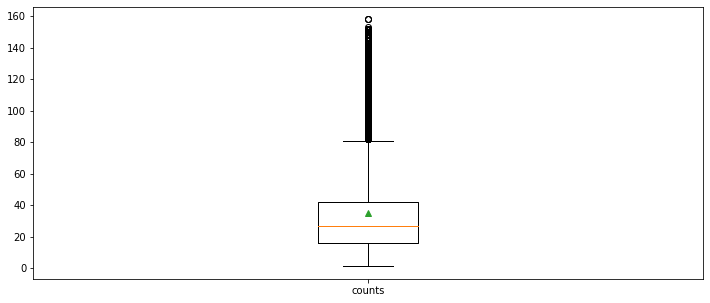

In [15]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

- 해석)
- 중간값과 평균은 아래쪽에 위치
- 일부 데이타가 긴 데이타가가 꽤 존재한다.

### 리뷰에 자주 사용된 어휘 살펴보기 -> 워드 클라우드

- 리뷰에 해당하는 document 컬럼만 train_review로 가져오기

In [17]:
train_review = [review for review in train_data['document'] if type(review) is str]

- 워드 클라우드 

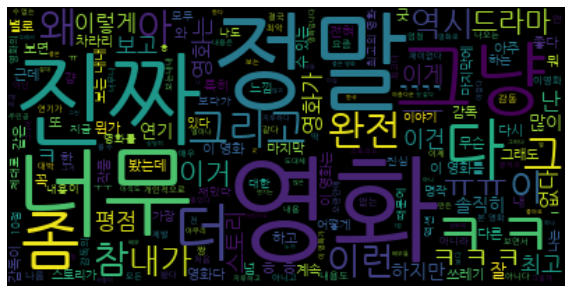

In [18]:
wordcloud = WordCloud(font_path = '"c:/windows/font/NanumGothic.ttf').generate(' '.join(train_review))

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 긍정과 부정 라벨값 비율

/Users/lisemara/miniforge3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

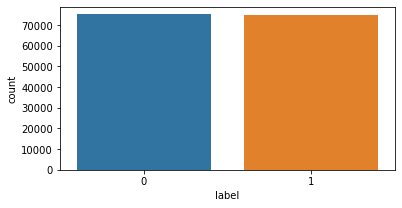

In [19]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['label'])

- 긍정과 부정 리뷰 개수

In [20]:
print("긍정 리뷰 개수: {}".format(train_data['label'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['label'].value_counts()[0]))

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


### 각 리뷰의 단어 수 확인
- 긱 리뷰를 띄어쓰기 기준으로 나누고 
- 그 갯수를 하나의 변수로 할당하고
- 그 값을 사용해 히스토그램으로 그리기

In [21]:
train_word_counts = train_data['document'].astype(str).apply(lambda x:len(x.split(' ')))

<ipython-input-22-56ec98339dc4>:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of reviews')

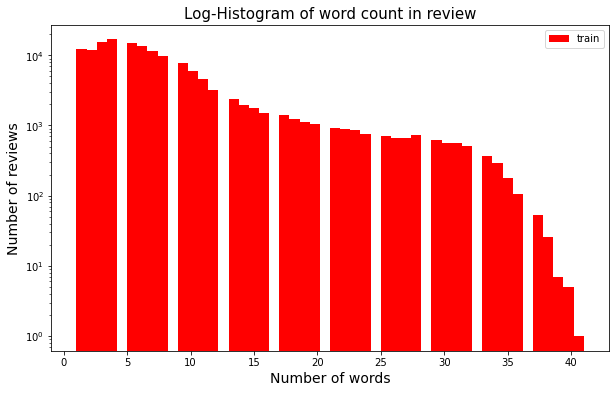

In [22]:
plt.figure(figsize=(10,6))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=14)
plt.ylabel('Number of reviews', fontsize=14)

- 그래프 해석)
- 각 리뷰의 단어 수는 대부분 5개 정도에 분포되어 있음
- 각 리뷰의 단어 수가 30개 이상 부터는 급격히 줄어듦

### 리뷰 단어 개수 기술통계

In [23]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 41
리뷰 단어 개수 최소 값: 1
리뷰 단어 개수 평균 값: 7.58
리뷰 단어 개수 표준편차: 6.51
리뷰 단어 개수 중간 값: 6.0
리뷰 단어 개수 제 1 사분위: 3.0
리뷰 단어 개수 제 3 사분위: 9.0


- 해석)
- 평균 7~8개의 단어 개수를 가짐
- 중간값의 경우 6개 정도
- 글자 수 제한이 있어서 영어 데이타에 비해 단어의 개수가 적은편
- 모델에 적용할 최대 단어수를 8개로 설정해도 크게 무리가 없을 것으로 보임

### 리뷰에 특수 문자 유무 확인

In [24]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x)) # 마침표
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))

물음표가있는 질문: 8.25%
마침표가 있는 질문: 51.76%


- 해석)
- 영화리뷰 데이타라 물음표는 거의 포함되어 있지 않고
- 마침표의 경우는 절반 정도의 리뷰에 포함되어 있음

-----------------------
### 2) 데이터 전처리

### 라이브러리 불러오기

In [25]:
import numpy as np
import pandas as pd
import re
import json
# from konlpy.tag import Okt
from konlpy.tag import Mecab
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

### 판다스 데이타프레임으로 데이타 불러오기

In [26]:
DATA_IN_PATH ='./data_in/'

train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header=0, delimiter='\t', quoting=3 )

print(train_data.head())

         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1


### 불러온 데이타 확인하기

In [27]:
train_data['document'][:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

- 영어와 달리 HTML 태그가 보이지 않음
- 특수 문자 혹인 숫자는 전처리가 필요해 보임

### 첫번째 리뷰로 전처리 진행
- 정규표현식을 이용하여 한글이 아닌 것은 모두 제거

In [28]:
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", train_data['document'][0]) 
print(review_text)

아 더빙 진짜 짜증나네요 목소리


### 불용어 제거
- 문장을 단어로 나누기: Okt 형태소 분석기 사용

In [33]:
# from konlpy.tag import Okt

# okt = Okt()
# review_text = okt.morphs(review_text, stem=True)

from konlpy.tag import Mecab

mecab = Mecab()
review_text = mecab.morphs(review_text)
print(review_text)

['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리']


- 불용어 사전을 만들어서 불용어 제거

In [34]:
# 불용어 사전을 만들어서 불용어 제거
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])
clean_review = [token for token in review_text if not token in stop_words]
print(clean_review)

['더', '빙', '진짜', '짜증', '나', '네요', '목소리']


### 전처리의 전과정을 함수로 생성: preprocessing()
- 함수의 인자
    - review : 전처리할 텍스트
    - okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    - remove_stopword : 불용어를 제거할지 선택 기본값은 False
    - stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트

In [35]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])

In [41]:
# from konlpy.tag import Mecab
# okt = Mecab()

# def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    
#     # 1. 한글 및 공백을 제외한 문자 모두 제거.
#     review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    
#     # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
#     word_review = okt.morphs(review_text, stem=True)
    
#     if remove_stopwords:        
#         # 불용어 제거(선택적)
#         word_review = [token for token in word_review if not token in stop_words]
#         # 단어 리스트를 공백을 넣어서 하나의 글로 합친다.
#         clean_review = ' '.join(word_review)
         
#     return clean_review

from konlpy.tag import Mecab
mecab = Mecab()

def preprocessing(review, mecab, remove_stopwords = False, stop_words = []):
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    
    # 2. mecab 객체를 활용해서 형태소 단위로 나눈다.
    word_review = mecab.morphs(review_text)
    
    if remove_stopwords:        
        # 불용어 제거(선택적)
        word_review = [token for token in word_review if not token in stop_words]
        # 단어 리스트를 공백을 넣어서 하나의 글로 합친다.
        clean_review = ' '.join(word_review)
         
    return clean_review

### 학습 데이타 전체에 함수를 이용한 전처리 진행

In [42]:
stop_words = [ '은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한']
# okt = Okt()
mecab = Mecab()
clean_train_review = []

for review in train_data['document']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        # clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
        clean_train_review.append(preprocessing(review, mecab, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])  #string이 아니면 비어있는 값 추가

In [43]:
clean_train_review[:4] # 앞의 4개 데이타 확인

['더 빙 진짜 짜증 나 네요 목소리',
 '흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍 지 않 구나',
 '너무 재 밓었다그래서보는것을추천한다',
 '교도소 이야기 구먼 솔직히 재미 없 다 평점 조정']

### 테스트 데이타도 학습 데이타와 동일하게 전처리 진행

In [44]:
test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt', header=0, delimiter='\t', quoting=3 )

clean_test_review = []

for review in test_data['document']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        # clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
        clean_test_review.append(preprocessing(review, mecab, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_test_review.append([])  #string이 아니면 비어있는 값 추가

In [45]:
clean_test_review[:4]

['굳 ㅋ', '', '뭐 야 평점 나쁘 진 않 지만 점 짜리 더더욱 아니 잖아', '지루 지 않 은데 완전 막장 임 돈 고 기 에']

### 전처리가 끝난 데이타를 텍스트 데이타와 인덱스로 벡터화한 데이타로 저장

### 1) 텍스트 형태로 저장 : 데이타프레임 --> csv 파일로 저장

In [46]:
# 전처리 과정이 끝난 전체 데이타 -> 데이타프레임으로 저장
# 학습 데이타
clean_train_df = pd.DataFrame({'id': train_data['id'], 'document': clean_train_review, 'label': train_data['label']})

# 테스트 데이타
clean_test_df = pd.DataFrame({'id': test_data['id'], 'document': clean_test_review, 'label': test_data['label']})
test_id = np.array(test_data['id'])

In [48]:
clean_train_df.head()

,id,document,label
0,9976970,더 빙 진짜 짜증 나 네요 목소리,0
1,3819312,흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍 지 않 구나,1
2,10265843,너무 재 밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기 구먼 솔직히 재미 없 다 평점 조정,0
4,6483659,사이몬페그 익살 스런 연기 돋보였 던 영화 스파이더맨 에서 늙 어 보이 기 만 했 ...,1


In [49]:
clean_test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐 야 평점 나쁘 진 않 지만 점 짜리 더더욱 아니 잖아,0
3,6825595,지루 지 않 은데 완전 막장 임 돈 고 기 에,0
4,6723715,만 아니 었 어도 별 다섯 개 줬 을 텐데 왜 로 나와서 제 심기 를 불편 게 죠,0


In [50]:
# 정제된 텍스트를 csv 형태로 저장
TRAIN_CLEAN_DATA = 'nsmc_train_clean.csv'
TEST_CLEAN_DATA = 'nsmc_test_clean.csv'
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index = False)

----------------------------------------
### [딥러닝을 위한 학습/테스트 데이타 저장하기]

### 2) 학습 데이타와 테스트 데이타를 인덱스 벡터로 바꾼 뒤 패딩 처리

### 텐서플로의 전처리 모듈 사용
- 토크나이징 객체 생성 후 학습 데이타에만 적용하고 
- 해당 객체를 사용하여 학습 데이타와 테스트 데이타를 인덱스 벡터로 생성
- 해당 데이터들을 패딩

In [51]:
# 토크나이징
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index # 단어 사전 형태
word_vocab["<PAD>"] = 0  # word_index에 <PAD>값이 정의되어 있지 않으므로 <PAD>의 인덱스 값을 0으로 입력

In [52]:
# 인덱스로 구성된 벡터 첫번째 값 : 각 단어의 인덱스로 바뀜
print(train_sequences[0])
print(test_sequences[0])

[63, 896, 29, 214, 12, 25, 699]
[682, 124]


In [53]:
# 각 인덱스가 어떤 단어를 의미하는 지 확인: 단어사전 필요
print(word_vocab)

': 48558, '밀어두': 48559, '농축': 48560, '밨어요채닝': 48561, '쵝오ㅜ': 48562, '췄': 48563, '됏지': 48564, '증오심': 48565, '원출': 48566, '맹추격': 48567, '내세웠으나': 48568, '편ㅎ': 48569, '촌방': 48570, '건남': 48571, '성리학': 48572, '크리스락': 48573, '려욱': 48574, '금순': 48575, '만자': 48576, '다왔': 48577, '낙의': 48578, '아이리': 48579, '얼룩말': 48580, '실래요': 48581, '트래픽': 48582, '지나갔으나': 48583, '켄터키': 48584, '툭탁': 48585, '왕은': 48586, '배때지': 48587, '산당': 48588, '적다': 48589, 'ㅉ다행이다': 48590, '낮췄': 48591, '조선왕조실록': 48592, '저출산': 48593, '즐겨요': 48594, '셀마블레어': 48595, '서신': 48596, '깝치겠지이': 48597, '야압': 48598, '걍대박': 48599, '도무사': 48600, '칀더라이인듯': 48601, '티란': 48602, '세형': 48603, '과신': 48604, '군마': 48605, '기쁠': 48606, 'ㅉㅂ': 48607, '스타이너': 48608, '의평': 48609, '합쳐져서': 48610, '소년탐정': 48611, '허덕여': 48612, '홀대': 48613, '꼐지': 48614, 'ㅠㅠ그래픽은': 48615, '뎄네외국도': 48616, '뎄네': 48617, '섬유': 48618, 'ㅡㅡ보는내내': 48619, '이은심': 48620, '알려져야': 48621, '전했': 48622, '김정학': 48623, 'ㅗ보는건가': 48624, 'ㅠ엄청길고': 48625, '뭉쳐진': 48626, '퀴들아': 48627, '허투': 48628, '쏠까': 48

In [54]:
# 전체 데이타에서 사용된 단어의 총 개수
print("전체 단어 개수: ", len(word_vocab))

전체 단어 개수:  49949


### 패딩 과정 - 데이타의 길이 맞추기
- 각 데이타의 길이가 서로 다른데 이 길이를 하나로 통일해야 모델에 바로 적용 가능하기 때문에
- 특정 길이를 최대 길이로 정하고 더 긴 데이타의 경우는 뒷부분을 자르고
- 더 짧은 데이타의 경우에는 0 값으로 패딩하는 작업 진행
- 텐서플로우의 전처리 모듈 이용

In [55]:
MAX_SEQUENCE_LENGTH = 8 # 문장 최대 길이 - 데이타분석과정에서 단어의 평균개수가 약 8개 정도

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 학습 데이터를 벡터화
train_labels = np.array(train_data['label']) # 학습 데이터의 라벨

test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 테스트 데이터를 벡터화
test_labels = np.array(test_data['label']) # 테스트 데이터의 라벨

In [56]:
print('Shape of train data: ', train_inputs.shape)
print('Shape of test data: ', test_inputs.shape)

Shape of train data:  (150000, 8)
Shape of test data:  (50000, 8)


### 인덱스 벡터 + 패딩 처리한 데이타 저장

In [57]:
DATA_IN_PATH = './data_in/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) # vocab size 추가

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

# 전처리 된 학습 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 전처리 된 테스트 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)